In [62]:
# Author: Rahul Nandakumar (E-ID: rn9355)
# Question 3 - All parts
# Making the necessary imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.special import beta
import scipy

In [63]:
# Initializing the values of theta

thetas = np.linspace(0,1,100000)

In [64]:
# Calculating the value of prior for each theta

priors = []
for theta in thetas:
    prior = ((0.5/beta(10,20))*np.power(theta, 9)*np.power(1-theta, 19)) + ((0.5/beta(20,10))*np.power(theta, 19)*np.power(1-theta, 9))
    priors.append(prior)


In [65]:
# Function definition for calculating the posterior 

def calculate_posterior(theta):
    denominator = (beta(13,27)/beta(10,20))+(beta(23,17)/beta(20,10))
    numerator_a = (beta(13,27))/(beta(13,27)*beta(10,20))
    numerator_b = (beta(23,17))/(beta(20,10)*beta(23,17))
    return ((numerator_a*np.power(theta, 12)*np.power(1-theta, 26)) + (numerator_b*np.power(theta, 22)*np.power(1-theta, 16)))/denominator
    

In [66]:
# Calculating the value of the posterior for each theta

posteriors = []
for theta in thetas:
    posterior = calculate_posterior(theta)
    posteriors.append(posterior)

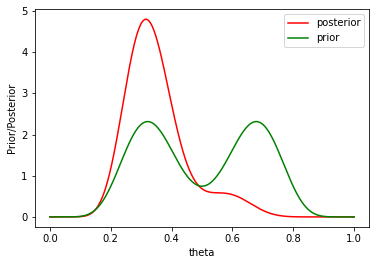

In [67]:
# Visualizing the posterior superimposed on the prior distribution

fig,ax = plt.subplots()
ax.plot(thetas, posteriors, 'r', label = 'posterior')
ax.plot(thetas, priors, 'g', label = 'prior')
ax.legend(loc="upper right")
ax.set_xlabel('theta')
ax.set_ylabel('Prior/Posterior')
plt.show()

In [68]:
# Function definition to calculate the random variates used to calculate the inverse cdf and then find the quantiles

def rvs(x, pdf, nvals):
    cumulative = np.cumsum(pdf(x))
    cumulative *= 1/cumulative[-1]

    randomvals = np.random.uniform(size = nvals)
    idx1 = np.searchsorted(cumulative, randomvals)
    idx0 = np.where(idx1 == 0, 0, idx1 - 1)
    idx1[idx0 == 0] = 1

    frac1 = (randomvals - cumulative[idx0])/ (cumulative[idx1] - cumulative[idx0])

    return x[idx0]*(1-frac1) + x[idx1]*frac1

In [69]:
# We find the random variates by calling the rvs function 

random_variates = rvs(thetas, calculate_posterior, 100000)

In [111]:
# Making use of the quantile function in the numpy package, we calculate the 0.05 and 0.95 quantiles.
quantile1 = np.quantile(random_variates, 0.05)
quantile2 = np.quantile(random_variates, 0.95)
quantile1, quantile2

(0.21266799901229458, 0.5844785401328614)

Text(0, 0.5, 'Posterior')

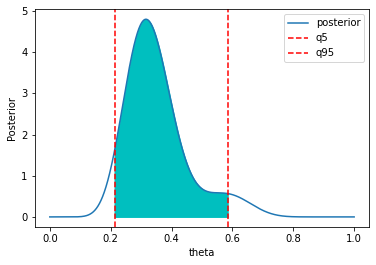

In [112]:
# Visualizing the quantile based credible region for the posterior

plt.plot(thetas, posteriors, label = 'posterior')
plt.axvline(x = quantile1, color = 'r',  ls = '--', label = 'q5')
plt.axvline(x = quantile2, color = 'r',  ls = '--', label = 'q95') 
condition1 = (thetas >=quantile1)
condition2 = (thetas <= quantile2)
plt.fill_between(thetas, posteriors, where = (condition1) & (condition2), color='c')
plt.legend(loc="upper right")
plt.xlabel('theta')
plt.ylabel('Posterior')